### Word2vec

Сегодня мы научимся работать с word2vec моделями. Загрузим и потестим предобученную, посмотрим, какие крутые свойства и функции у нее бывают, обучим свою модель и с помощью нее улучшим качество кластеризации(и/или классификации) текстов

Установим все необходимое

#### Скачаем rucorpora 15 с диска https://yadi.sk/d/fLRMFhm03Pbs98

In [9]:
# Прописываем путь до файла
#path_to_ruscorpora = <Ваш код>
path_to_ruscorpora = 'ruscorpora.model.bin'

Импортируем нужные библиотеки

In [10]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm
import gensim

Шапка для картинок

In [12]:
import matplotlib.pyplot as plt
# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
plt.style.use('default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)


import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)# для встроенных картинок


Populating the interactive namespace from numpy and matplotlib


Сначала познакомимся с уже готовой реализацией word2vec на gensim

#### Загрузим обученную на ruscorpora модель word2vec

In [44]:
model_word2vec = gensim.models.KeyedVectors.load_word2vec_format(path_to_ruscorpora, binary = True)

2017-11-11 15:14:31,560 : INFO : loading projection weights from ruscorpora.model.bin
2017-11-11 15:14:41,359 : INFO : loaded (374526, 300) matrix from ruscorpora.model.bin


In [45]:
model_word2vec.wv.vocab

{'это': <gensim.models.keyedvectors.Vocab at 0x1144e2390>,
 'весь': <gensim.models.keyedvectors.Vocab at 0x1144e2128>,
 'человек': <gensim.models.keyedvectors.Vocab at 0x1144e2550>,
 'мочь': <gensim.models.keyedvectors.Vocab at 0x1144e2748>,
 'год': <gensim.models.keyedvectors.Vocab at 0x1144e2518>,
 'сказать': <gensim.models.keyedvectors.Vocab at 0x1144e20b8>,
 'время': <gensim.models.keyedvectors.Vocab at 0x1144e2780>,
 'говорить': <gensim.models.keyedvectors.Vocab at 0x1144e2198>,
 'становиться': <gensim.models.keyedvectors.Vocab at 0x1144e2710>,
 'знать': <gensim.models.keyedvectors.Vocab at 0x1144e2b00>,
 'самый': <gensim.models.keyedvectors.Vocab at 0x1144e2048>,
 'жизнь': <gensim.models.keyedvectors.Vocab at 0x1144e20f0>,
 'дело': <gensim.models.keyedvectors.Vocab at 0x1144e27b8>,
 'день': <gensim.models.keyedvectors.Vocab at 0x1144e2588>,
 'рука': <gensim.models.keyedvectors.Vocab at 0x114d5aeb8>,
 'первый': <gensim.models.keyedvectors.Vocab at 0x111ff8940>,
 'очень': <gensim.m

#### Посмотрим, как с ней обращаться

Можно посмотреть наиболее похожие на одни и наиболее непохожие на другие слова. Попробуйте свойтсва векторов word2vec и подумать какие слова нужно послать на вход, чтобы получить на выходе слова "школа",  "машинное", "обучение"

In [65]:
model_word2vec.most_similar(positive=['корабль'], negative=['парус'], topn=3)

[('судно', 0.46701741218566895),
 ('крейсер', 0.3743194341659546),
 ('пароход', 0.33206048607826233)]

In [80]:
model_word2vec.most_similar(positive=['корабль', 'летать'], negative=['плавать'], topn=3)

[('самолет', 0.5802854895591736),
 ('судно', 0.5336376428604126),
 ('дирижабль', 0.5083059072494507)]

In [87]:
model_word2vec.most_similar(positive=['шахтер'], negative=['грязь'], topn=3)

[('горняк', 0.3543156385421753),
 ('ударник', 0.336887001991272),
 ('металлург', 0.3220180869102478)]

In [100]:
model_word2vec.most_similar(positive=['учение', 'тьма'], negative=['свет'], topn=3)

[('мрак', 0.4193800389766693),
 ('догмат', 0.38442569971084595),
 ('философия', 0.38409462571144104)]

Еще есть прикольная функция, которая выводит слово, лишнее в строке. Попробуйте придумать пример, который word2vec не взломает

In [47]:
model_word2vec.doesnt_match("коньяк компот водка пиво".split())

'компот'

Функция, которая выводит сходство между словами.  С ее помощью можно понимать значение слова нефть

In [48]:
print(model_word2vec.similarity('нефть', 'газ'))
print(model_word2vec.similarity('нефть', 'вода'))
print(model_word2vec.similarity('нефть', 'водка'))
print(model_word2vec.similarity('нефть', 'духи'))
print(model_word2vec.similarity('нефть', 'компот'))


0.401784575535
0.246770688846
0.0859883239246
0.0297233953559
0.014373137645


Или смотреть, где в России больше нефти

In [49]:
print(model_word2vec.similarity('нефть', 'чечня'))
print(model_word2vec.similarity('нефть', 'якутск'))
print(model_word2vec.similarity('нефть', 'москва'))
print(model_word2vec.similarity('нефть', 'саратов'))
print(model_word2vec.similarity('нефть', 'сибирь'))

0.102318135805
0.0374594075176
0.00765520311232
0.00437990603761
0.0863051911584


### Теперь давайте обучим собственную модель

 В качестве обучающего корпуса возьмем новости по 20 темам

In [19]:
from sklearn.datasets import fetch_20newsgroups
train_all = fetch_20newsgroups(subset='train')
print(train_all.target_names, " - 20 возможных тем")

dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey'])

dataset.data[0].split()

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']  - 20 возможных тем


['From:',
 'erik@cheshire.oxy.edu',
 '(Erik',
 'Adams)',
 'Subject:',
 'HELP!!',
 'My',
 'Macintosh',
 '"luggable"',
 'has',
 'lines',
 'on',
 'its',
 'screen!',
 'Organization:',
 'Occidental',
 'College,',
 'Los',
 'Angeles,',
 'CA',
 '90041',
 'USA.',
 'Distribution:',
 'comp',
 'Lines:',
 '20',
 'Okay,',
 'I',
 "don't",
 'use',
 'it',
 'very',
 'much,',
 'but',
 'I',
 'would',
 'like',
 'for',
 'it',
 'to',
 'keep',
 'working',
 'correctly,',
 'at',
 'least',
 'as',
 'long',
 'as',
 'Apple',
 'continues',
 'to',
 'make',
 'System',
 'software',
 'that',
 'will',
 'run',
 'on',
 'it,',
 'if',
 'slowly',
 ':-)',
 'Here',
 'is',
 'the',
 'problem:',
 'When',
 'the',
 'screen',
 'is',
 'tilted',
 'too',
 'far',
 'back,',
 'vertical',
 'lines',
 'appear',
 'on',
 'the',
 'screen.',
 'They',
 'are',
 'every',
 '10',
 'pixels',
 'or',
 'so,',
 'and',
 'seem',
 'to',
 'be',
 'affected',
 'somewhat',
 'by',
 'opening',
 'windows',
 'and',
 'pulling',
 'down',
 'menus.',
 'It',
 'looks',
 't

Предобраотаем эти новости. Выкинем цифры, знаки пунктуации, цифры, переведем в нижний регистр, разобьем на слова
Нормализуйте слова, например с помощью модуля nltk (или используйте любой другой способ на ваш выбор)

In [29]:
import string 
def normalize(x):
    dict_rus = ''.join(x)
    translator = str.maketrans({key: ' ' for key in string.punctuation.replace('/', '').replace('-', '') + string.digits + '№'})
    dict_rus =dict_rus.translate(translator).lower()
    x_preprocessed = dict_rus.split()
    #<Ваш код>
    return(x_preprocessed)

In [30]:
# Применяем фунции предобработки к нашим новостям
data_normalized = [normalize(new) for new in tqdm(dataset.data)]

100%|██████████| 1777/1777 [00:00<00:00, 2951.22it/s]


Все, обучающий корпус готов!

In [31]:
# импортируем модули, настраиваем логирование
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = data_normalized
model = gensim.models.Word2Vec(sentences, min_count=1)

2017-11-11 14:58:27,188 : INFO : collecting all words and their counts
2017-11-11 14:58:27,190 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-11 14:58:27,393 : INFO : collected 25825 word types from a corpus of 508463 raw words and 1777 sentences
2017-11-11 14:58:27,394 : INFO : Loading a fresh vocabulary
2017-11-11 14:58:27,488 : INFO : min_count=1 retains 25825 unique words (100% of original 25825, drops 0)
2017-11-11 14:58:27,489 : INFO : min_count=1 leaves 508463 word corpus (100% of original 508463, drops 0)
2017-11-11 14:58:27,607 : INFO : deleting the raw counts dictionary of 25825 items
2017-11-11 14:58:27,609 : INFO : sample=0.001 downsamples 52 most-common words
2017-11-11 14:58:27,611 : INFO : downsampling leaves estimated 405784 word corpus (79.8% of prior 508463)
2017-11-11 14:58:27,612 : INFO : estimated required memory for 25825 words and 100 dimensions: 33572500 bytes
2017-11-11 14:58:27,747 : INFO : resetting layer weights
2017-11-11

In [32]:
model = gensim.models.Word2Vec(iter=1)  # Задаем пустую модель, не натренированную
model.build_vocab(sentences)  # Строим словарь
model.train(sentences, total_examples=model.corpus_count, epochs=20)  # Тренируем модель

2017-11-11 14:58:31,346 : INFO : collecting all words and their counts
2017-11-11 14:58:31,348 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-11 14:58:31,533 : INFO : collected 25825 word types from a corpus of 508463 raw words and 1777 sentences
2017-11-11 14:58:31,534 : INFO : Loading a fresh vocabulary
2017-11-11 14:58:31,586 : INFO : min_count=5 retains 7923 unique words (30% of original 25825, drops 17902)
2017-11-11 14:58:31,587 : INFO : min_count=5 leaves 477458 word corpus (93% of original 508463, drops 31005)
2017-11-11 14:58:31,643 : INFO : deleting the raw counts dictionary of 25825 items
2017-11-11 14:58:31,646 : INFO : sample=0.001 downsamples 54 most-common words
2017-11-11 14:58:31,648 : INFO : downsampling leaves estimated 371067 word corpus (77.7% of prior 477458)
2017-11-11 14:58:31,650 : INFO : estimated required memory for 7923 words and 100 dimensions: 10299900 bytes
2017-11-11 14:58:31,697 : INFO : resetting layer weights
2017-1

7422020

Теперь давайте нарисуем слова из первой новости в нашем новом пространстве

In [33]:
# Берем слова из первой новости, достаем соостветствующие векторы, выбрасываем слова, для которых векторов нет. 
# Подумайте - как так могло получится, что нет векторов?
labels = []
embeddings = []
data_to_tsne = [item for sublist in data_normalized[:20] for item in sublist]
for x in list(set(data_to_tsne)):
    try:
        embeddings.append(model[x])
        labels.append(x)
    except KeyError:
        continue
         

In [34]:
# Пишем функцию, которая будет нам все отрисовывать.
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Сжимаем наше 100-мерное пространство в 2-х мерное
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform((embeddings[:plot_only]))


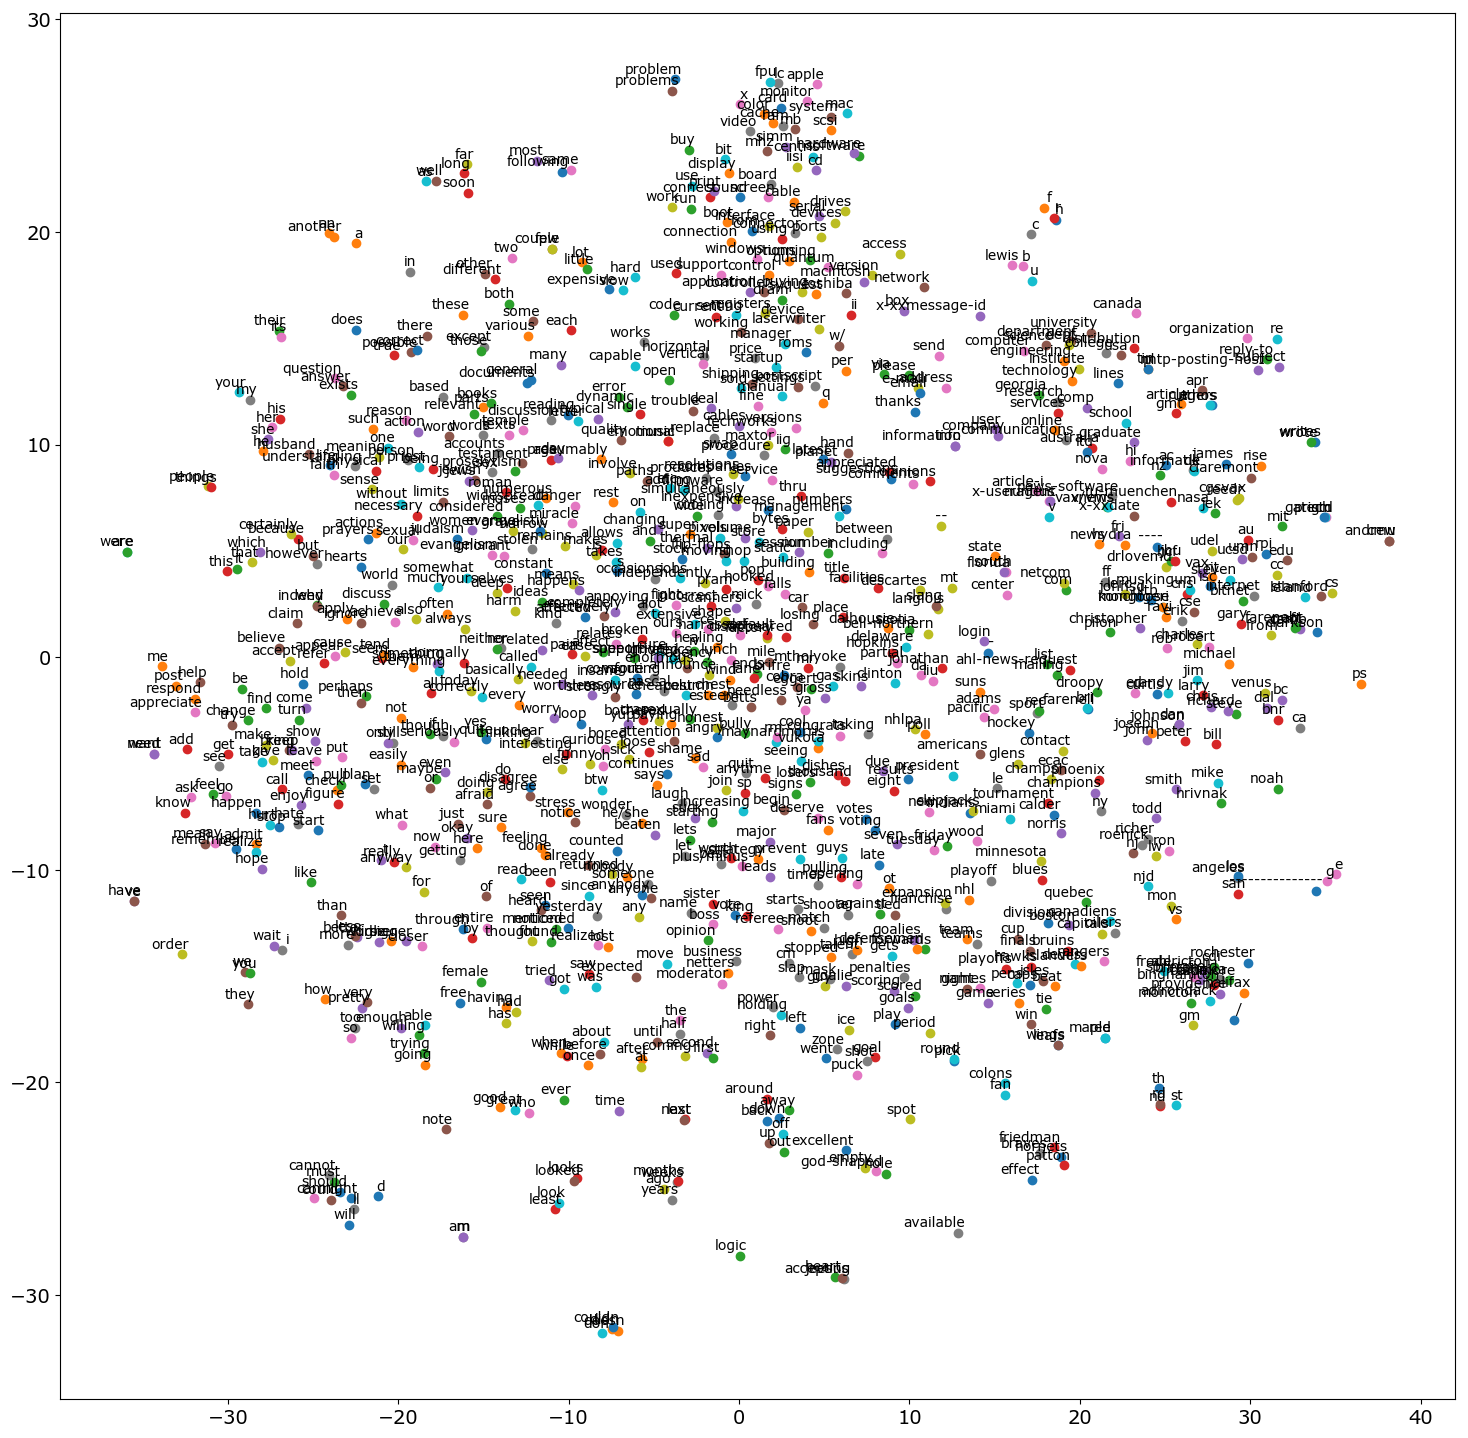

In [39]:
# Рисуем только первые 1000 слов

labels_to_draw = [labels[i] for i in range(plot_only)]
a = plot_with_labels(low_dim_embs, labels_to_draw)


### Пункт 0
Проделайте аналогичную отрисовку и сжатие векторов для предобученной модели (для этого скачайте бинарник по этой ссылке - https://code.google.com/archive/p/word2vec/ (файл GoogleNews-vectors-negative300) по аналогии с тем, как мы работали с русским корпусом). Сравните результаты

In [ ]:
<Ваш код>

### Попробуем с помощью нашей модели улучшить качество кластеризации текстов
Если вы не понимаете, что такое кластеризация - почитать об этом можно по ссылке  - http://scikit-learn.org/stable/modules/clustering.html

Если вам все равно кажется, что это сложно, и вы чувствуете себя более уверено в задаче классификации - вместо задачи кластеризации можно рассматривать задачу классификации - тогда вместо функции quality используйте roc-auc из библиотеки scikit learn, все остальные шаги предобработки и измерения признаков аналогичны

Мерить качество кластеризации будем следующим образом - измерим количество правильных попаданий категории в кластера

In [ ]:
import itertools
def quality(preds, target, dataset):
    permutations = list(itertools.permutations([0, 1, 2]))
    scores = []
    for a, b, c in permutations:
        mapping = {2 : a, 1: b, 0: c}
        mapped_preds = [mapping[pred] for pred in preds]
        scores.append(float(sum(mapped_preds != target)) / len(target))
    return(1 - min(scores))

### Пункт 1

Кластеризуйте датасет с заданием признаков с помощью one hot encoding - посмотрите на результат

In [ ]:
<Ваш код>

### Пункт 2
Далее кластеризуем тексты на векторах, полученных из модели, которую мы сами обучили

Напишем функцию, которая делает из предложения вектор - просто складывает вектора всех слов и усредняет. Если слов нет в словаре, то прибавляет нулевой вектор

In [ ]:
def average_feature_vector(words, model):
    <Ваш код>
    return av_feat_vec

Применим функцию к нашим данным (уже нормализованным функцией normalize)

In [ ]:
data_normalized_vectors = [average_feature_vector(sent, model) for sent in data_normalized]

Сожмем массив признаковс помощью tsne до нескольких компонент (попробуйте поварьировать число компонент)

In [ ]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors))

Примените алгоритм кластеризации (тут тоже есть где поэкспериментировать, можно K-means)

In [ ]:
<Ваш код>

### Пункт 3

Кластеризуем тексты на векторах, полученных из предобученной модели. Какой результат получился лучше? Почему?

In [ ]:
<Ваш код>

### Пункт 4 - для суперменов

Попробуйте получить аналогичные вектора и провети исследование на них с помощью fastq - неплохое введение - https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/

In [ ]:
<Ваш код>

### Правила сдачи и критерии оценки:

##### Суперобязательная часть (40 % баллов)

1) Дописать функцию normalize, нормализующую тексты 

2) Пункт 0

##### Обязательная часть (40 % баллов)

1) Пункт 1

2) Пункт 2

3) Пункт 3

##### Продвинутая часть (20 % баллов)

1) Любые самые смелые ваши идеи-эксперименты по тому, как можно улучшить качество моделей (пофильтровать какие-то части речи, редкие слова, использовать FastText)

2) Интересные, необычные, просто хорошо сформулированные выводы о вашей работе в отчете

При проверке отчета будет обращаться внимание на ваш анализ и оригинальность подходов) Не нужно бояться экспериментировать и гуглить - машинное обучение ближе, чем кажется!


##### Как и куда сдавать:

К jupiter- тетрадке нужно приложить текстовый отчет (желательно в word), в котором вы описываете, какие шаги выполняли, какое качество-графики получали и что это значит.

Свой jupiter-noteebook вместе с отчетом присылать на почту savelievatanyya@gmail.com или в телеграмм http://telegram.me/tany_savelieva  со своим именем в качестве названия.

Дедлайн - 19 ноября 9 утра

ПО ВСЕМ ВОПРОСАМ, КАСАЮЩИМСЯ ЗАДАНИЯ (например, Таня, я не знаю, где смотреть, как кластеризуются-нормализуются тексты ) МОЖНО и НУЖНО писать мне на почту-в телеграмм - обещаю ответить в течение дня!